In [28]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_dataset(filename):
    """
    Loads the dataset
    """
    return pd.read_csv(filename, parse_dates=[0], index_col='Date')

In [113]:
IBM = load_dataset('./data/IBMStock.csv')
GE = load_dataset('./data/GEStock.csv')
ProcterGamble = load_dataset('./data/ProcterGambleStock.csv')
CocaCola = load_dataset('./data/CocaColaStock.csv')
Boeing = load_dataset('./data/BoeingStock.csv')

In [6]:
#Summary Statistics

# How many observations in each dataset ( Hint: All have same number of observations )
print GE.shape

(480, 1)


In [9]:
# What is the earliest year in our datasets ?
print GE.sort_index().head(1)

            StockPrice
Date                  
1970-01-01   74.253333


In [12]:
# What is the latest year in our datasets ?
print GE.sort_index().sort(ascending=False).head(1)

            StockPrice
Date                  
2009-12-01   15.754545


In [14]:
# What is the mean stock price of IBM over this time period?
IBM.StockPrice.mean()

144.37503030766666

In [15]:
# What is the minimum stock price of GE over this time period?
GE.StockPrice.min()

9.2936363639999993

In [16]:
# What is the maximum stock price of Coca-Cola over this time period?
CocaCola.StockPrice.max()

146.58428569999998

In [17]:
# What is the median stock price of Boeing over this time period?
Boeing.StockPrice.median()

44.88339827

In [18]:
# What is the standard deviation of the stock price of Procter & Gamble over this time period?
ProcterGamble.StockPrice.std()

18.194140307971598

Visualizing Stock Dynamics
=============

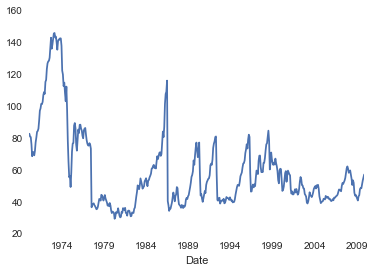

In [23]:
ax = CocaCola.StockPrice.plot();

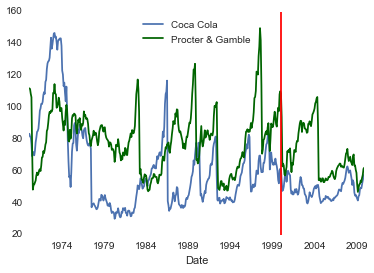

In [34]:
ax = CocaCola.StockPrice.plot(label='Coca Cola');
ProcterGamble.StockPrice.plot(color='DarkGreen', label='Procter & Gamble', ax=ax);
plt.axvline(x='2000', color='r')
plt.legend(loc='best');

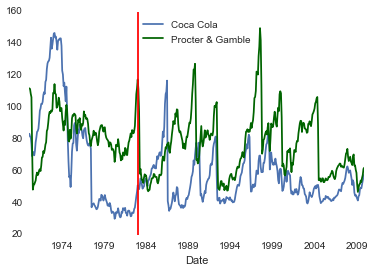

In [35]:
ax = CocaCola.StockPrice.plot(label='Coca Cola');
ProcterGamble.StockPrice.plot(color='DarkGreen', label='Procter & Gamble', ax=ax);
plt.axvline(x='1983', color='r')
plt.legend(loc='best');

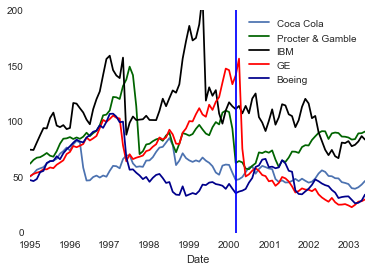

In [54]:
ax = CocaCola.iloc[300:402,:].StockPrice.plot(label='Coca Cola', ylim=[0, 201])
ProcterGamble.ix[300:402,:].StockPrice.plot(color='DarkGreen', label='Procter & Gamble', ax=ax);
IBM.ix[300:402,:].StockPrice.plot(color='Black', label='IBM', ax=ax);
GE.ix[300:402,:].StockPrice.plot(color='Red', label='GE', ax=ax);
Boeing.ix[300:402,:].StockPrice.plot(color='DarkBlue', label='Boeing', ax=ax);
plt.axvline(x='2000-03-01')
plt.legend(loc='best');

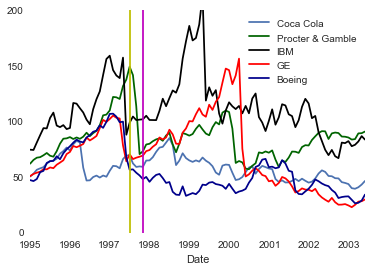

In [63]:
ax = CocaCola.iloc[300:402,:].StockPrice.plot(label='Coca Cola', ylim=[0, 201])
ProcterGamble.ix[300:402,:].StockPrice.plot(color='DarkGreen', label='Procter & Gamble', ax=ax);
IBM.ix[300:402,:].StockPrice.plot(color='Black', label='IBM', ax=ax);
GE.ix[300:402,:].StockPrice.plot(color='Red', label='GE', ax=ax);
Boeing.ix[300:402,:].StockPrice.plot(color='DarkBlue', label='Boeing', ax=ax);
plt.axvline(x='1997-07-01',color='y')
plt.axvline(x='1997-11-01', color='m')
plt.legend(loc='best');

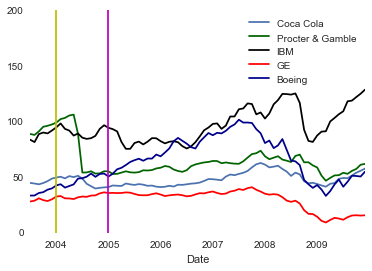

In [67]:
ax = CocaCola.iloc[402:,:].StockPrice.plot(label='Coca Cola', ylim=[0, 201])
ProcterGamble.ix[402:,:].StockPrice.plot(color='DarkGreen', label='Procter & Gamble', ax=ax);
IBM.ix[402:,:].StockPrice.plot(color='Black', label='IBM', ax=ax);
GE.ix[402:,:].StockPrice.plot(color='Red', label='GE', ax=ax);
Boeing.ix[402:,:].StockPrice.plot(color='DarkBlue', label='Boeing', ax=ax);
plt.axvline(x='2004',color='y')
plt.axvline(x='2005', color='m')
plt.legend(loc='best');

Monthly Trends
=======

In [101]:
months = pd.Series(IBM.index[:]).dt.month

In [125]:
IBM_months = IBM.copy()

In [126]:
IBM_months = IBM_months.reset_index(drop=False)

In [128]:
IBM_months['months'] = IBM_months.Date.dt.month

In [130]:
IBM_months.groupby('months').mean()

,StockPrice
months,
1,150.238423
2,152.693993
3,152.432690
4,152.116824
5,151.502194
6,139.090676
7,139.067018
8,140.145475
9,139.088527


In [131]:
IBM_months.StockPrice.mean()

144.37503030766666

In [132]:
GE = GE.reset_index(drop=False)
CocaCola = CocaCola.reset_index(drop=False)
ProcterGamble = ProcterGamble.reset_index(drop=False)
Boeing = Boeing.reset_index(drop=False)

In [133]:
GE['months'] = GE.Date.dt.month
CocaCola['months'] = CocaCola.Date.dt.month
ProcterGamble['months'] = ProcterGamble.Date.dt.month
Boeing['months'] = Boeing.Date.dt.month

In [134]:
GE.groupby('months').mean()

,StockPrice
months,
1,62.045106
2,62.520805
3,63.150548
4,64.480092
5,60.871351
6,56.468439
7,56.733493
8,56.503149
9,56.239131


In [135]:
CocaCola.groupby('months').mean()

,StockPrice
months,
1,60.368487
2,60.734754
3,62.071354
4,62.688882
5,61.443581
6,60.812084
7,58.983460
8,58.880139
9,57.600238
